In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

In [2]:
df = pd.read_csv("../lab-eda-univariate/.gitignore/amz_uk_price_prediction_dataset.csv")

In [3]:
display(df.shape, df.head(3))

(2443651, 9)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


## Part 1: Analyzing Best-Seller Trends Across Product Categories

1. Crosstab Analysis:

    - Create a crosstab between the product 'category' and the 'isBestSeller' status.

    - Are there categories where being a best-seller is more prevalent?

In [4]:
display(df['category'].head(3), df['isBestSeller'].head(3))

0    Hi-Fi Speakers
1    Hi-Fi Speakers
2    Hi-Fi Speakers
Name: category, dtype: object

0    False
1     True
2    False
Name: isBestSeller, dtype: bool

In [5]:
#crosstab_result = pd.crosstab(df['category'], df['isBestSeller'], margins=True , values=df, aggfunc='mean')
#display(crosstab_result)

crosstab_result = pd.crosstab(df['category'], df['isBestSeller'], margins=True) #, values=df.isBestSeller, aggfunc='mean')
crosstab_result['bestseller_pourcentage'] = [(x[1]/x[2]) * 100 for x in crosstab_result.values]
crosstab_result.sort_values('bestseller_pourcentage', ascending=False)

isBestSeller,False,True,All,bestseller_pourcentage
category,,,,
Grocery,9008,556,9564,5.813467
Smart Home Security & Lighting,98,6,104,5.769231
Health & Personal Care,9017,552,9569,5.768628
Mobile Phone Accessories,248,11,259,4.247104
Power & Hand Tools,8353,306,8659,3.533895
...,...,...,...,...
Snowboard Boots,1449,0,1449,0.000000
Internal TV Tuner & Video Capture Cards,253,0,253,0.000000
Boxes & Organisers,911,0,911,0.000000


**Yes**, being a best seller is more prevalent for the **Grocery** category

2. Statistical Tests:

    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [6]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

display(chi2_statistic, chi2_p_value)

65170.478055445434

0.0

The p-value is under 0.05, this suggests that there is a significant association between the best-seller distribution and the product category.

In [8]:
# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

ValueError: `observed` must be an integer array.

In [102]:
type(crosstab_result)

pandas.core.frame.DataFrame

3. Visualizations:

    - Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Axes: xlabel='category'>

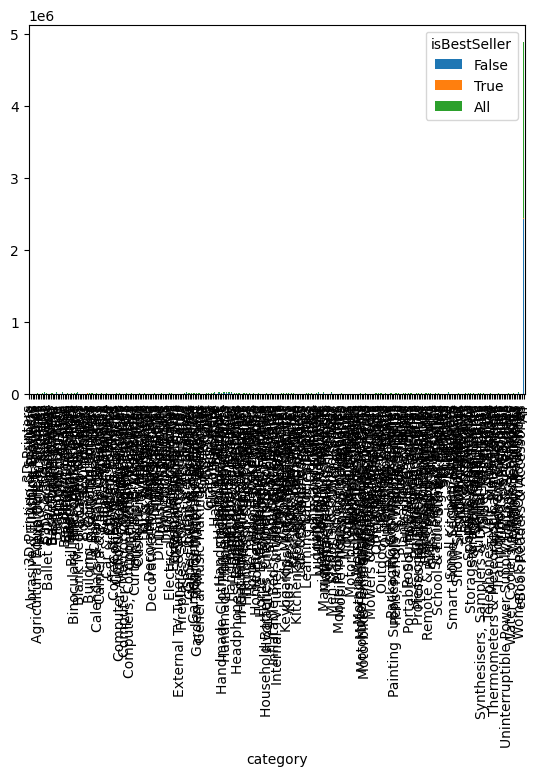

In [84]:
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstab_result.plot(kind="bar", stacked=True)

## Part 2: Exploring Product Prices and Ratings Across Categories and Brands

## Part 3: Investigating the Interplay Between Product Prices and Ratings